In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import random
import warnings
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, mean_absolute_percentage_error, classification_report
from sklearn import metrics
np.random.seed(34)
warnings.filterwarnings('ignore')

In [2]:
index_names = ['ENGINE', 'CYCLE']
setting_names = ['SET1', 'SET2', 'SET3']
sensor_names=[ "INLET_TEMP",
"LPC_OUT_TEMP",
"HPC_OUT_TEMP",
"LPT_OUT_TEMP",
"FAN_IN_PR",
"BYPASS-PR",
"HPC_OUT_PR",
"FAN_RPM",
"CORE_RPM",
"ENGINE_PR",
"HPC_OUT",
"FUEL_RATIO",
"FAN_RPM_CORR",
"CORE_RPM_CORR",
"BYPASS RATIO",
"FUEL_RATIO_BURNER",
"ENTHALPY_BLEED",
"FAN_SPEED_REQ",
"CONV_FAN_SPEED",
"HP_AIRFLOW",
"LPC_AIRFLOW" ]
col_names = index_names + setting_names + sensor_names

In [3]:
data = pd.read_csv('CMaps\\train_FD001.txt',sep= " ",header=None,index_col=False,names=col_names)

In [4]:
pd.set_option('display.max_columns', None)
df = data.copy()
df

,ENGINE,CYCLE,SET1,SET2,SET3,INLET_TEMP,LPC_OUT_TEMP,HPC_OUT_TEMP,LPT_OUT_TEMP,FAN_IN_PR,BYPASS-PR,HPC_OUT_PR,FAN_RPM,CORE_RPM,ENGINE_PR,HPC_OUT,FUEL_RATIO,FAN_RPM_CORR,CORE_RPM_CORR,BYPASS RATIO,FUEL_RATIO_BURNER,ENTHALPY_BLEED,FAN_SPEED_REQ,CONV_FAN_SPEED,HP_AIRFLOW,LPC_AIRFLOW
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,21.61,551.43,2388.19,9065.52,1.3,48.07,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,21.61,550.86,2388.23,9065.11,1.3,48.04,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,21.61,550.94,2388.24,9065.90,1.3,48.09,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,21.61,550.68,2388.25,9073.72,1.3,48.39,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


In [5]:
df.shape

(20631, 26)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ENGINE             20631 non-null  int64  
 1   CYCLE              20631 non-null  int64  
 2   SET1               20631 non-null  float64
 3   SET2               20631 non-null  float64
 4   SET3               20631 non-null  float64
 5   INLET_TEMP         20631 non-null  float64
 6   LPC_OUT_TEMP       20631 non-null  float64
 7   HPC_OUT_TEMP       20631 non-null  float64
 8   LPT_OUT_TEMP       20631 non-null  float64
 9   FAN_IN_PR          20631 non-null  float64
 10  BYPASS-PR          20631 non-null  float64
 11  HPC_OUT_PR         20631 non-null  float64
 12  FAN_RPM            20631 non-null  float64
 13  CORE_RPM           20631 non-null  float64
 14  ENGINE_PR          20631 non-null  float64
 15  HPC_OUT            20631 non-null  float64
 16  FUEL_RATIO         206

In [7]:
df.loc[:,['ENGINE','CYCLE']].describe()

,ENGINE,CYCLE
count,20631.000000,20631.000000
mean,51.506568,108.807862
std,29.227633,68.880990
min,1.000000,1.000000
25%,26.000000,52.000000
50%,52.000000,104.000000
75%,77.000000,156.000000
max,100.000000,362.000000


In [8]:
df.loc[:,['SET1','SET2','SET3']].describe()

,SET1,SET2,SET3
count,20631.000000,20631.000000,20631.0
mean,-0.000009,0.000002,100.0
std,0.002187,0.000293,0.0
min,-0.008700,-0.000600,100.0
25%,-0.001500,-0.000200,100.0
50%,0.000000,0.000000,100.0
75%,0.001500,0.000300,100.0
max,0.008700,0.000600,100.0


In [9]:
df.loc[:,'INLET_TEMP':'LPC_AIRFLOW'].describe()

,INLET_TEMP,LPC_OUT_TEMP,HPC_OUT_TEMP,LPT_OUT_TEMP,FAN_IN_PR,BYPASS-PR,HPC_OUT_PR,FAN_RPM,CORE_RPM,ENGINE_PR,HPC_OUT,FUEL_RATIO,FAN_RPM_CORR,CORE_RPM_CORR,BYPASS RATIO,FUEL_RATIO_BURNER,ENTHALPY_BLEED,FAN_SPEED_REQ,CONV_FAN_SPEED,HP_AIRFLOW,LPC_AIRFLOW
count,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,5.186700e+02,642.680934,1590.523119,1408.933782,1.462000e+01,21.609803,553.367711,2388.096652,9065.242941,1.300000e+00,47.541168,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,6.537152e-11,0.500053,6.131150,9.000605,3.394700e-12,0.001389,0.885092,0.070985,22.082880,4.660829e-13,0.267087,0.737553,0.071919,19.076176,0.037505,1.556432e-14,1.548763,0.0,0.0,0.180746,0.108251
min,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,21.600000,549.850000,2387.900000,9021.730000,1.300000e+00,46.850000,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,5.186700e+02,642.325000,1586.260000,1402.360000,1.462000e+01,21.610000,552.810000,2388.050000,9053.100000,1.300000e+00,47.350000,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,21.610000,553.440000,2388.090000,9060.660000,1.300000e+00,47.510000,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,5.186700e+02,643.000000,1594.380000,1414.555000,1.462000e+01,21.610000,554.010000,2388.140000,9069.420000,1.300000e+00,47.700000,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,21.610000,556.060000,2388.560000,9244.590000,1.300000e+00,48.530000,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


In [10]:
unwanted=[]
for i in df.select_dtypes(include=np.number):
    if df[i].nunique()==1:
        unwanted.append(i)

unwanted

['SET3',
 'INLET_TEMP',
 'FAN_IN_PR',
 'ENGINE_PR',
 'FUEL_RATIO_BURNER',
 'FAN_SPEED_REQ',
 'CONV_FAN_SPEED']

In [11]:
df.drop(columns=unwanted, inplace=True)
print(df.shape)
df

(20631, 19)


,ENGINE,CYCLE,SET1,SET2,LPC_OUT_TEMP,HPC_OUT_TEMP,LPT_OUT_TEMP,BYPASS-PR,HPC_OUT_PR,FAN_RPM,CORE_RPM,HPC_OUT,FUEL_RATIO,FAN_RPM_CORR,CORE_RPM_CORR,BYPASS RATIO,ENTHALPY_BLEED,HP_AIRFLOW,LPC_AIRFLOW
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,643.49,1597.98,1428.63,21.61,551.43,2388.19,9065.52,48.07,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735
20627,100,197,-0.0016,-0.0005,643.54,1604.50,1433.58,21.61,550.86,2388.23,9065.11,48.04,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594
20628,100,198,0.0004,0.0000,643.42,1602.46,1428.18,21.61,550.94,2388.24,9065.90,48.09,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333
20629,100,199,-0.0011,0.0003,643.23,1605.26,1426.53,21.61,550.68,2388.25,9073.72,48.39,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640


In [12]:
data_RUL = df.groupby(['ENGINE']).agg({'CYCLE':'max'})
data_RUL.rename(columns={'CYCLE':'LIFE'},inplace=True)
data_RUL.head()

,LIFE
ENGINE,
1,192
2,287
3,179
4,189
5,269


In [13]:
df_RUL=df.merge(data_RUL,how='left',on=['ENGINE'])
df_RUL['RUL']=df_RUL['LIFE']-df_RUL['CYCLE']
df_RUL.drop(['LIFE'],axis=1,inplace=True)
df_RUL.drop(['CYCLE'],axis=1,inplace=True)
df_RUL

,ENGINE,SET1,SET2,LPC_OUT_TEMP,HPC_OUT_TEMP,LPT_OUT_TEMP,BYPASS-PR,HPC_OUT_PR,FAN_RPM,CORE_RPM,HPC_OUT,FUEL_RATIO,FAN_RPM_CORR,CORE_RPM_CORR,BYPASS RATIO,ENTHALPY_BLEED,HP_AIRFLOW,LPC_AIRFLOW,RUL
0,1,-0.0007,-0.0004,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191
1,1,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190
2,1,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189
3,1,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188
4,1,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,-0.0004,-0.0003,643.49,1597.98,1428.63,21.61,551.43,2388.19,9065.52,48.07,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735,4
20627,100,-0.0016,-0.0005,643.54,1604.50,1433.58,21.61,550.86,2388.23,9065.11,48.04,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594,3
20628,100,0.0004,0.0000,643.42,1602.46,1428.18,21.61,550.94,2388.24,9065.90,48.09,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333,2
20629,100,-0.0011,0.0003,643.23,1605.26,1426.53,21.61,550.68,2388.25,9073.72,48.39,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640,1


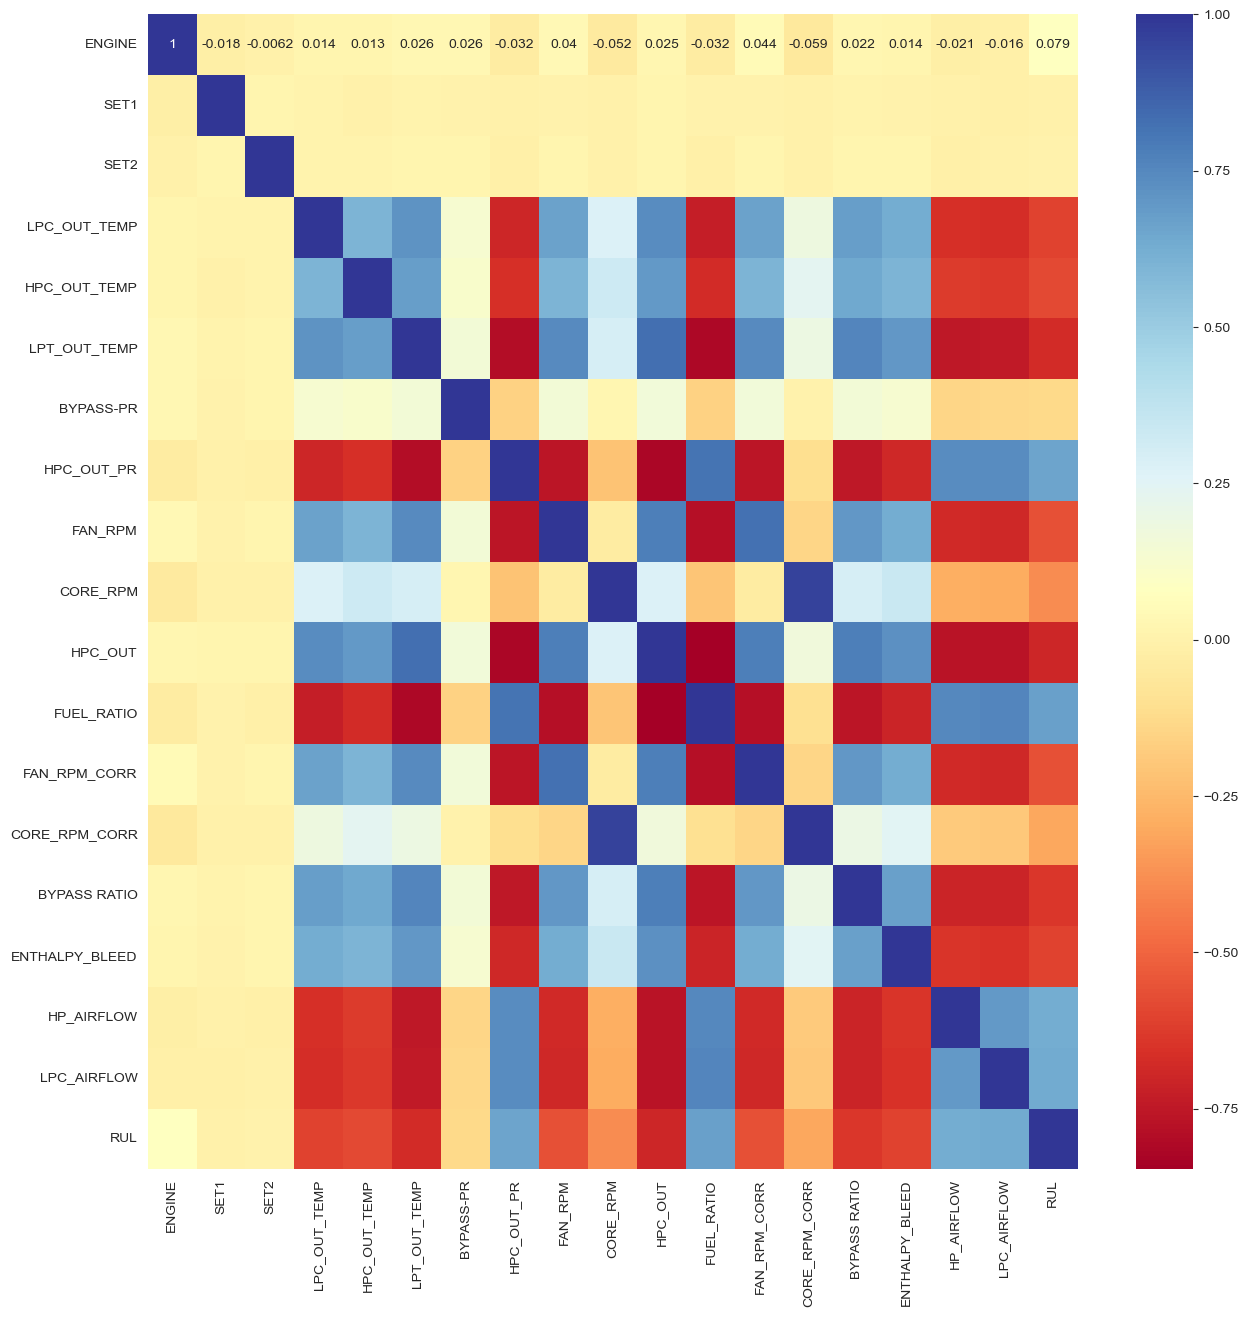

In [14]:
plt.figure(figsize=(15,15))
sns.set_style("whitegrid", {"axes.facecolor": ".0"})
df_cluster2 = df_RUL.corr()
plot_kws={"s": 1}
sns.heatmap(df_RUL.corr(),
            cmap='RdYlBu',
            annot=True,
            linecolor='lightgrey').set_facecolor('white')

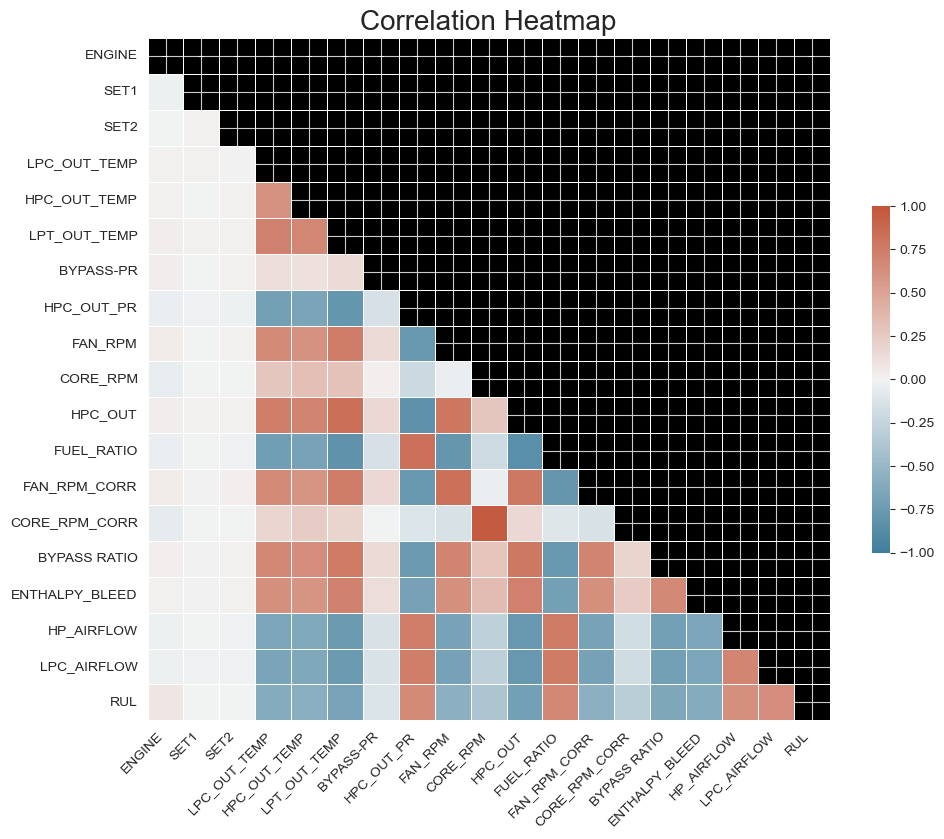

In [15]:
corr = df_RUL.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f",
            annot_kws={"size": 8})

# Enhance readability
plt.xticks(fontsize=10, rotation=45, ha='right')
plt.yticks(fontsize=10)
plt.title('Correlation Heatmap', fontsize=20)

# Show the heatmap
plt.show()

In [16]:
correlations_with_RUL = corr['RUL'].drop('RUL')

# Calculate the absolute values of the correlations
absolute_correlations = correlations_with_RUL.abs()

# Sort the absolute correlations in descending order to identify the strongest correlations
sorted_indices = absolute_correlations.sort_values(ascending=False).index

# Retrieve the original correlation values for the sorted indices
sorted_correlations = correlations_with_RUL.loc[sorted_indices]

# Print the sorted correlations with their original signs
print(sorted_correlations)

HPC_OUT          -0.696228
LPT_OUT_TEMP     -0.678948
FUEL_RATIO        0.671983
HPC_OUT_PR        0.657223
BYPASS RATIO     -0.642667
LPC_AIRFLOW       0.635662
HP_AIRFLOW        0.629428
LPC_OUT_TEMP     -0.606484
ENTHALPY_BLEED   -0.606154
HPC_OUT_TEMP     -0.584520
FAN_RPM          -0.563968
FAN_RPM_CORR     -0.562569
CORE_RPM         -0.390102
CORE_RPM_CORR    -0.306769
BYPASS-PR        -0.128348
ENGINE            0.078753
SET1             -0.003198
SET2             -0.001948
Name: RUL, dtype: float64


array([[<Axes: title={'center': 'ENGINE'}>,
        <Axes: title={'center': 'SET1'}>,
        <Axes: title={'center': 'SET2'}>,
        <Axes: title={'center': 'LPC_OUT_TEMP'}>],
       [<Axes: title={'center': 'HPC_OUT_TEMP'}>,
        <Axes: title={'center': 'LPT_OUT_TEMP'}>,
        <Axes: title={'center': 'BYPASS-PR'}>,
        <Axes: title={'center': 'HPC_OUT_PR'}>],
       [<Axes: title={'center': 'FAN_RPM'}>,
        <Axes: title={'center': 'CORE_RPM'}>,
        <Axes: title={'center': 'HPC_OUT'}>,
        <Axes: title={'center': 'FUEL_RATIO'}>],
       [<Axes: title={'center': 'FAN_RPM_CORR'}>,
        <Axes: title={'center': 'CORE_RPM_CORR'}>,
        <Axes: title={'center': 'BYPASS RATIO'}>,
        <Axes: title={'center': 'ENTHALPY_BLEED'}>],
       [<Axes: title={'center': 'HP_AIRFLOW'}>,
        <Axes: title={'center': 'LPC_AIRFLOW'}>,
        <Axes: title={'center': 'RUL'}>, <Axes: >]], dtype=object)

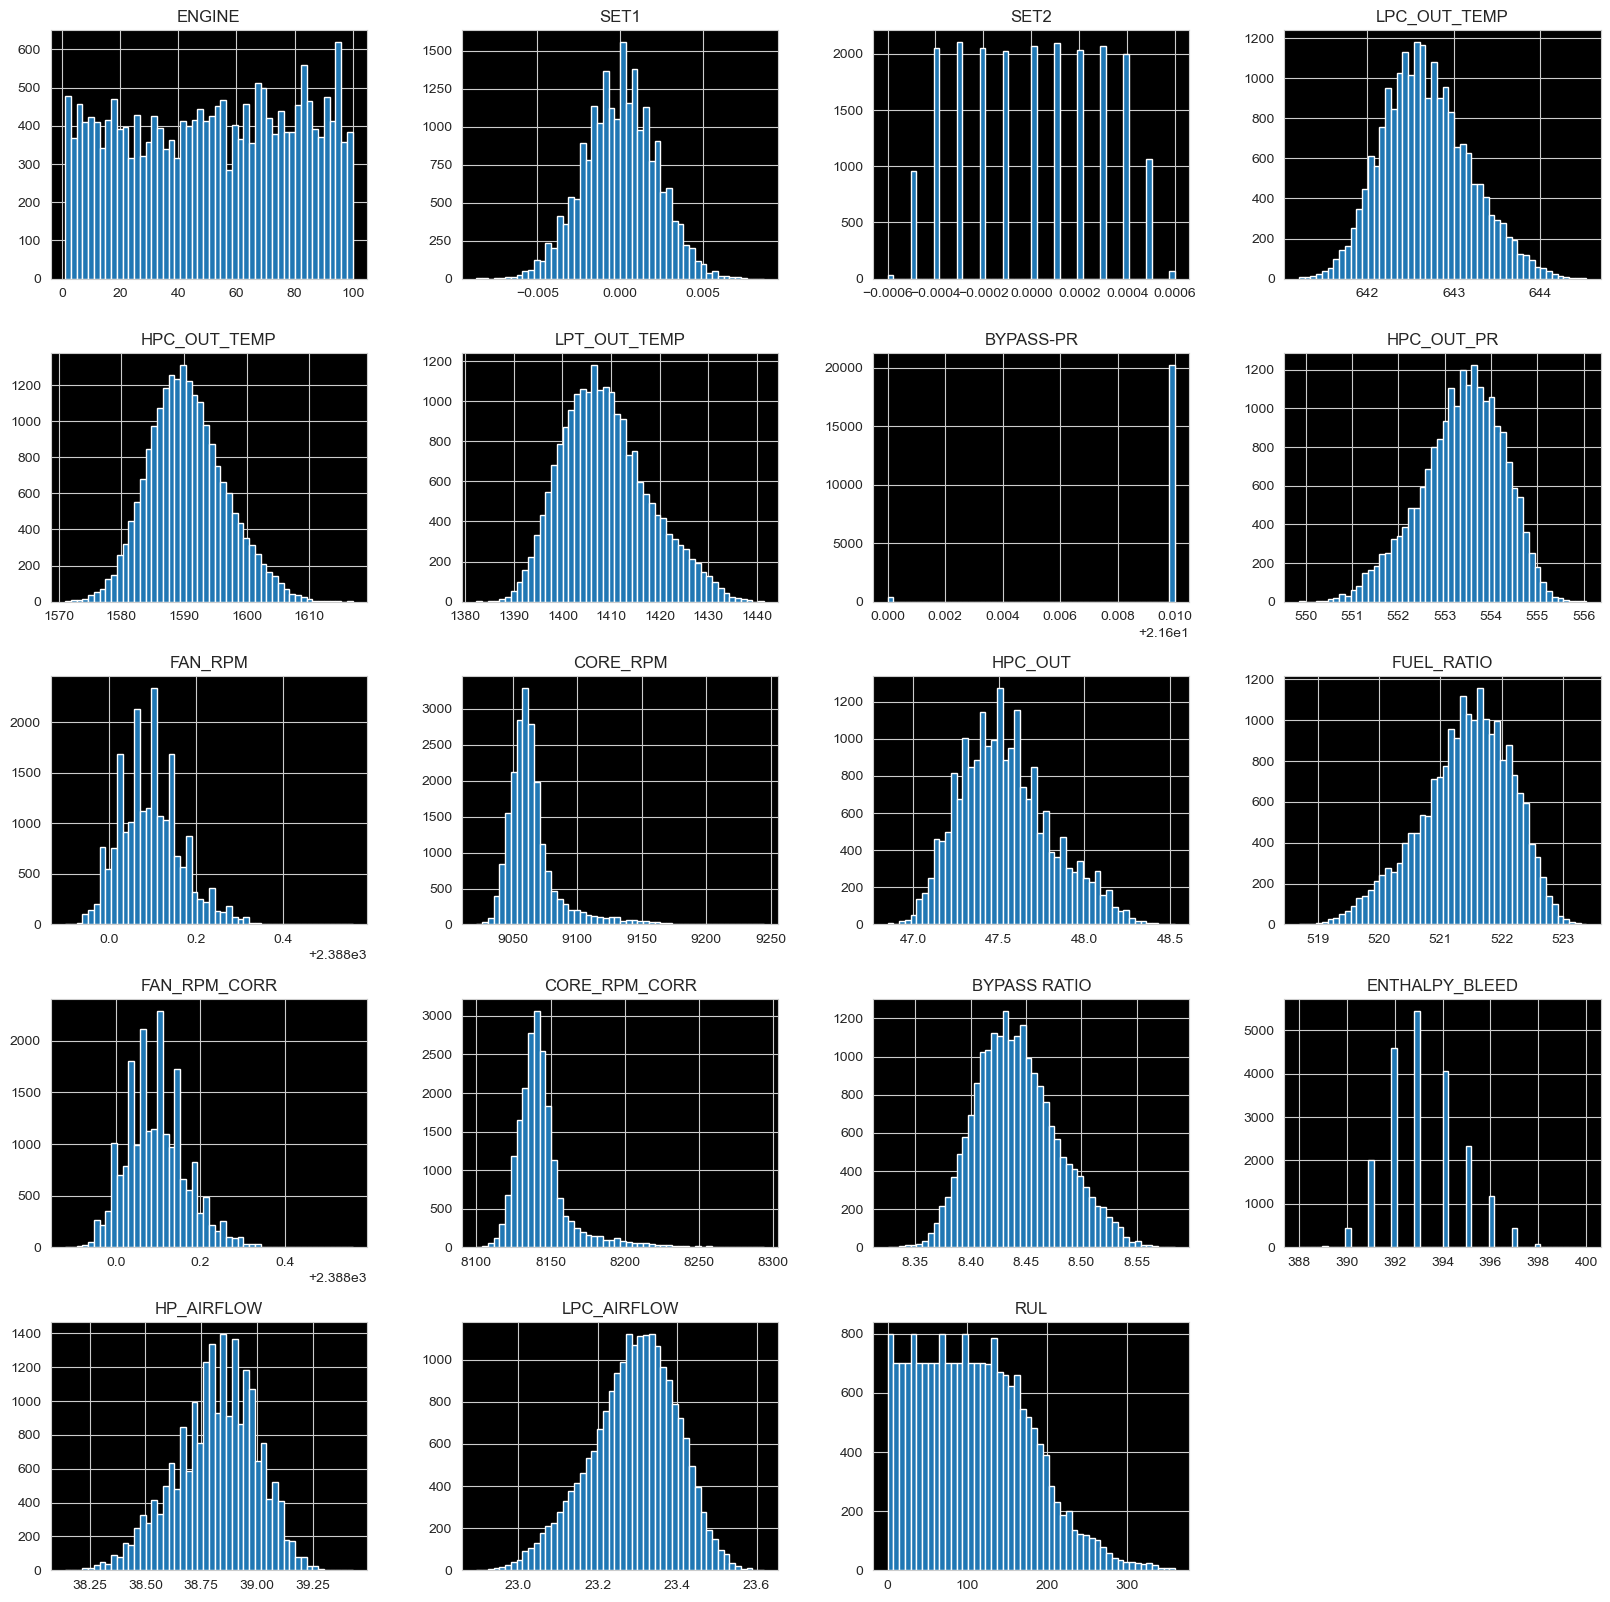

In [17]:
df_RUL.hist(bins=50, figsize=(20, 20))

In [18]:
labels={1:"DANGER",2:"NOT DANGER YET",3:"SAFE"}

label=[]

#--Transforming rul values to classes :
for i in df_RUL['RUL']:
    if i<=69:
        label.append(1)
    elif i>69 and i<=135:
        label.append(2)
    else:
        label.append(3)
label=np.array(label)

drop_labels = ['ENGINE', 'SET1', 'SET2']
df_train_test=df_RUL.drop(columns=drop_labels).copy()
# Make a copy of the dataset to apply transformations
df_transformed = df_train_test.copy()
X_train, X_test, y_train, y_test=train_test_split(df_train_test,np.array(label), test_size=0.4, stratify=np.array(label))

In [19]:
#scaler = StandardScaler()
scaler = MinMaxScaler()
#Droping the target variable
X_train.drop(columns=['RUL'], inplace=True)
X_test.drop(columns=['RUL'], inplace=True)

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

array([[<Axes: title={'center': 'LPC_OUT_TEMP'}>,
        <Axes: title={'center': 'HPC_OUT_TEMP'}>,
        <Axes: title={'center': 'LPT_OUT_TEMP'}>,
        <Axes: title={'center': 'BYPASS-PR'}>],
       [<Axes: title={'center': 'HPC_OUT_PR'}>,
        <Axes: title={'center': 'FAN_RPM'}>,
        <Axes: title={'center': 'CORE_RPM'}>,
        <Axes: title={'center': 'HPC_OUT'}>],
       [<Axes: title={'center': 'FUEL_RATIO'}>,
        <Axes: title={'center': 'FAN_RPM_CORR'}>,
        <Axes: title={'center': 'CORE_RPM_CORR'}>,
        <Axes: title={'center': 'BYPASS RATIO'}>],
       [<Axes: title={'center': 'ENTHALPY_BLEED'}>,
        <Axes: title={'center': 'HP_AIRFLOW'}>,
        <Axes: title={'center': 'LPC_AIRFLOW'}>, <Axes: >]], dtype=object)

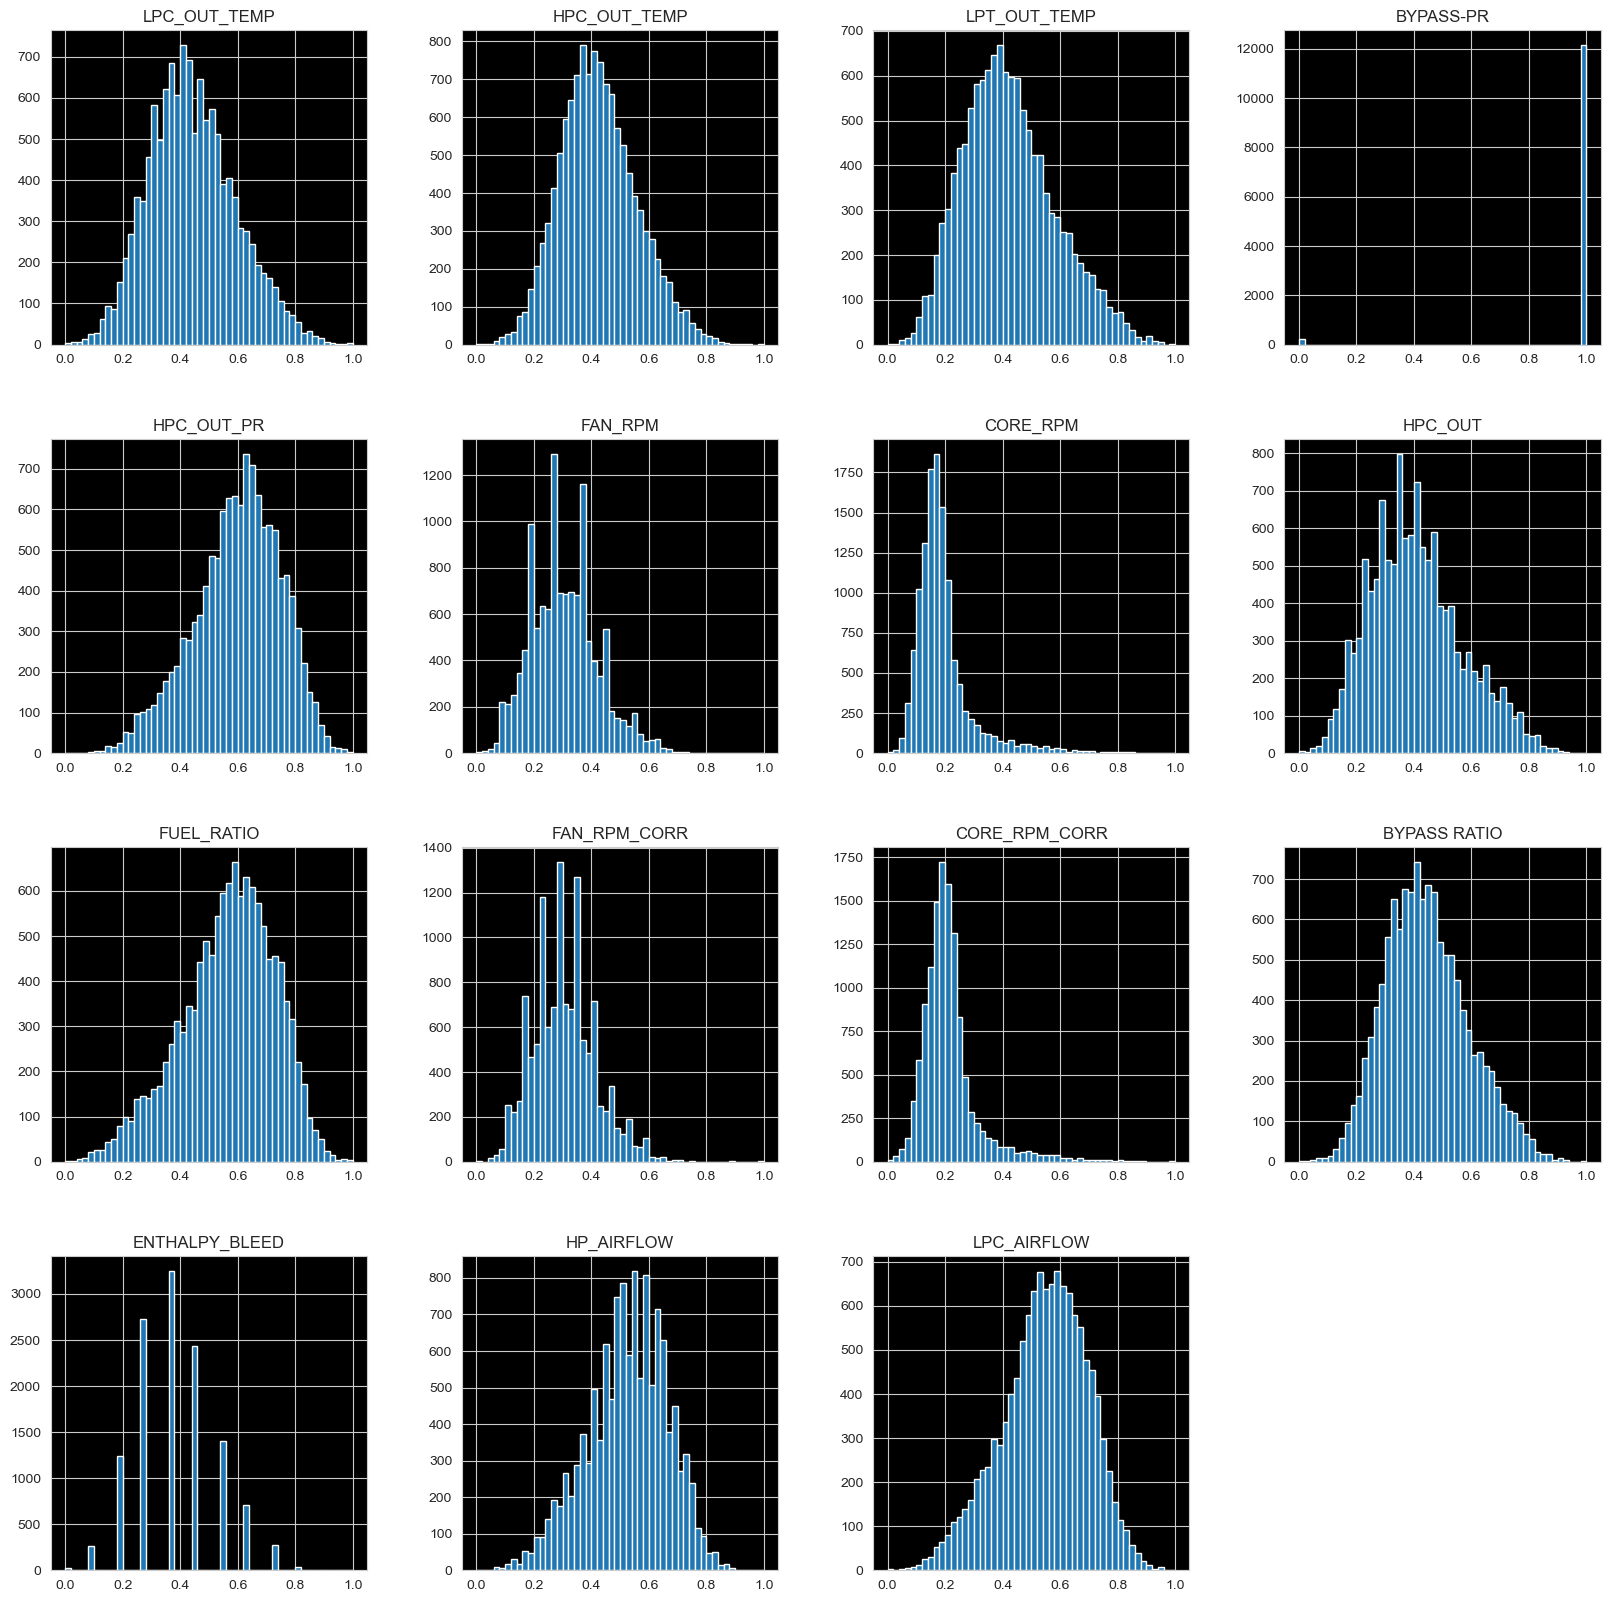

In [20]:
X_train_scaled_df = pd.DataFrame(X_train, columns=X_train.columns)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

X_train_scaled_df.hist(bins=50, figsize=(20, 20))

In [21]:

def mean_absolute_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / (y_true)))

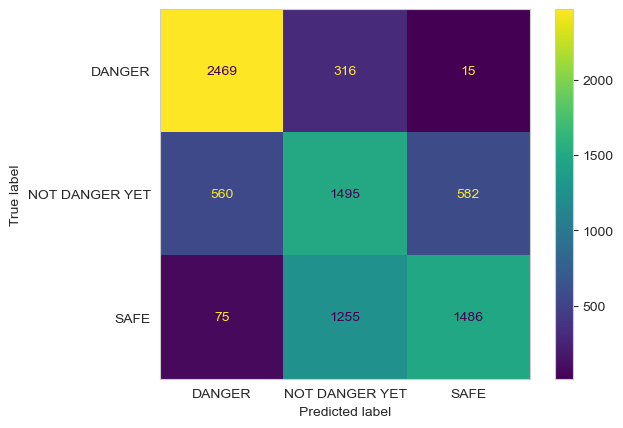

SVM-linear
Accuracy score of training 0.686
Error rate of training 0.181
Accuracy score of test 0.660
Error rate of test 0.168
              precision    recall  f1-score   support

           1       0.80      0.88      0.84      2800
           2       0.49      0.57      0.52      2637
           3       0.71      0.53      0.61      2816

    accuracy                           0.66      8253
   macro avg       0.67      0.66      0.66      8253
weighted avg       0.67      0.66      0.66      8253



In [22]:
from sklearn.svm import SVC
classifier_SVC = SVC(kernel = 'linear',random_state = 42)
classifier=classifier_SVC
classifier.fit(X_train_scaled,np.array(y_train))
y_svc_train=classifier.predict(X_train_scaled)

y_svc_test=classifier.predict(X_test_scaled)


cm= confusion_matrix(y_test, y_svc_test, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[labels[classifier.classes_[0]],labels[classifier.classes_[1]],labels[classifier.classes_[2]]])
disp.plot()
plt.grid(False)
plt.show()

# Measure the performance
print('SVM-linear')
print("Accuracy score of training %.3f" %metrics.accuracy_score(y_train, y_svc_train))
print("Error rate of training %.3f" %mean_absolute_error(y_train,y_svc_train))
print("Accuracy score of test %.3f" %metrics.accuracy_score(y_test, y_svc_test))
print("Error rate of test %.3f" %mean_absolute_error(y_test,y_svc_test))
print(classification_report(y_test,y_svc_test))

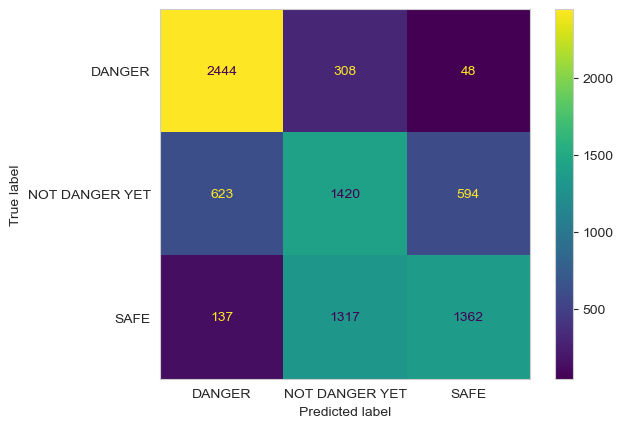

RandomForestClassifier
Accuracy score of training 0.989
Error rate of training 0.006
Accuracy score of test 0.633
Error rate of test 0.187
              precision    recall  f1-score   support

           1       0.76      0.87      0.81      2800
           2       0.47      0.54      0.50      2637
           3       0.68      0.48      0.57      2816

    accuracy                           0.63      8253
   macro avg       0.64      0.63      0.63      8253
weighted avg       0.64      0.63      0.63      8253



In [23]:
from sklearn.ensemble import RandomForestClassifier
classifier_RF=RandomForestClassifier(n_estimators=10)
classifier=classifier_RF
classifier.fit(X_train_scaled,np.array(y_train))
y_svc_train=classifier.predict(X_train_scaled)

y_svc_test=classifier.predict(X_test_scaled)


cm= confusion_matrix(y_test, y_svc_test, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[labels[classifier.classes_[0]],labels[classifier.classes_[1]],labels[classifier.classes_[2]]])
disp.plot()
plt.grid(False)
plt.show()

# Measure the performance
print('RandomForestClassifier')
print("Accuracy score of training %.3f" %metrics.accuracy_score(y_train, y_svc_train))
print("Error rate of training %.3f" %mean_absolute_error(y_train,y_svc_train))
print("Accuracy score of test %.3f" %metrics.accuracy_score(y_test, y_svc_test))
print("Error rate of test %.3f" %mean_absolute_error(y_test,y_svc_test))
print(classification_report(y_test,y_svc_test))

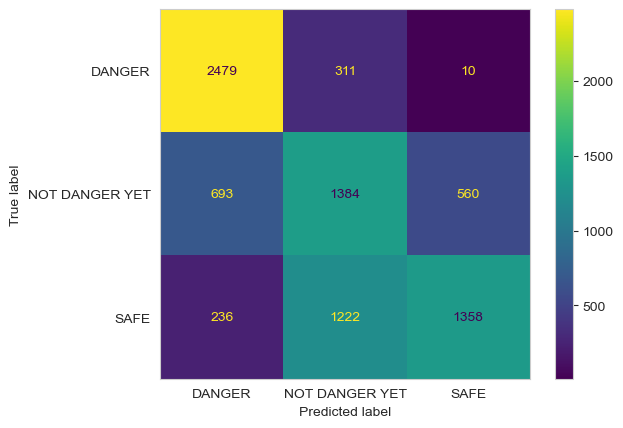

GaussianNB
Accuracy score of training 0.647
Error rate of training 0.191
Accuracy score of test 0.633
Error rate of test 0.184
              precision    recall  f1-score   support

           1       0.73      0.89      0.80      2800
           2       0.47      0.52      0.50      2637
           3       0.70      0.48      0.57      2816

    accuracy                           0.63      8253
   macro avg       0.64      0.63      0.62      8253
weighted avg       0.64      0.63      0.63      8253



In [24]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
classifier=gnb
classifier.fit(X_train_scaled,np.array(y_train))
y_svc_train=classifier.predict(X_train_scaled)

y_svc_test=classifier.predict(X_test_scaled)


cm= confusion_matrix(y_test, y_svc_test, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[labels[classifier.classes_[0]],labels[classifier.classes_[1]],labels[classifier.classes_[2]]])
disp.plot()
plt.grid(False)
plt.show()

# Measure the performance
print('GaussianNB')
print("Accuracy score of training %.3f" %metrics.accuracy_score(y_train, y_svc_train))
print("Error rate of training %.3f" %mean_absolute_error(y_train,y_svc_train))
print("Accuracy score of test %.3f" %metrics.accuracy_score(y_test, y_svc_test))
print("Error rate of test %.3f" %mean_absolute_error(y_test,y_svc_test))
print(classification_report(y_test,y_svc_test))

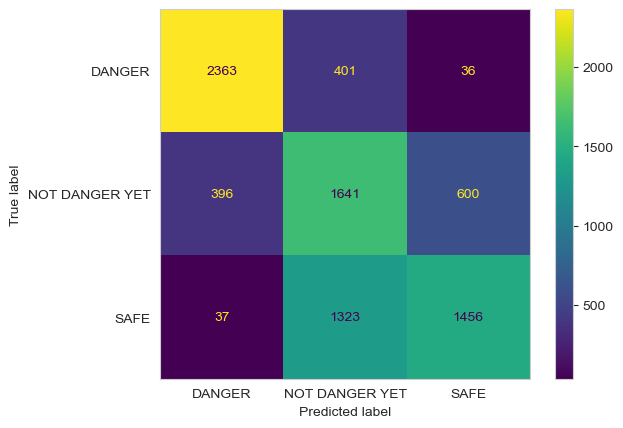

KNeighborsClassifier
Accuracy score of training 0.696
Error rate of training 0.187
Accuracy score of test 0.662
Error rate of test 0.174
              precision    recall  f1-score   support

           1       0.85      0.84      0.84      2800
           2       0.49      0.62      0.55      2637
           3       0.70      0.52      0.59      2816

    accuracy                           0.66      8253
   macro avg       0.68      0.66      0.66      8253
weighted avg       0.68      0.66      0.66      8253



In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=100)
classifier=knn
classifier.fit(X_train_scaled,np.array(y_train))
y_svc_train=classifier.predict(X_train_scaled)

y_svc_test=classifier.predict(X_test_scaled)


cm= confusion_matrix(y_test, y_svc_test, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[labels[classifier.classes_[0]],labels[classifier.classes_[1]],labels[classifier.classes_[2]]])
disp.plot()
plt.grid(False)
plt.show()

# Measure the performance
print('KNeighborsClassifier')
print("Accuracy score of training %.3f" %metrics.accuracy_score(y_train, y_svc_train))
print("Error rate of training %.3f" %mean_absolute_error(y_train,y_svc_train))
print("Accuracy score of test %.3f" %metrics.accuracy_score(y_test, y_svc_test))
print("Error rate of test %.3f" %mean_absolute_error(y_test,y_svc_test))
print(classification_report(y_test,y_svc_test))

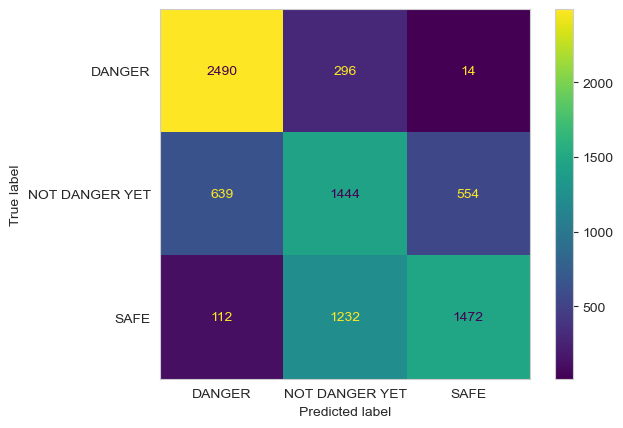

LogisticRegression
Accuracy score of training 0.684
Error rate of training 0.179
Accuracy score of test 0.655
Error rate of test 0.170
              precision    recall  f1-score   support

           1       0.77      0.89      0.82      2800
           2       0.49      0.55      0.51      2637
           3       0.72      0.52      0.61      2816

    accuracy                           0.66      8253
   macro avg       0.66      0.65      0.65      8253
weighted avg       0.66      0.66      0.65      8253



In [26]:
from sklearn.linear_model import LogisticRegression
logistic_regression_model = LogisticRegression(max_iter=1000, random_state=42)
classifier=logistic_regression_model
classifier.fit(X_train_scaled,np.array(y_train))
y_svc_train=classifier.predict(X_train_scaled)

y_svc_test=classifier.predict(X_test_scaled)


cm= confusion_matrix(y_test, y_svc_test, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[labels[classifier.classes_[0]],labels[classifier.classes_[1]],labels[classifier.classes_[2]]])
disp.plot()
plt.grid(False)
plt.show()

# Measure the performance
print('LogisticRegression')
print("Accuracy score of training %.3f" %metrics.accuracy_score(y_train, y_svc_train))
print("Error rate of training %.3f" %mean_absolute_error(y_train,y_svc_train))
print("Accuracy score of test %.3f" %metrics.accuracy_score(y_test, y_svc_test))
print("Error rate of test %.3f" %mean_absolute_error(y_test,y_svc_test))
print(classification_report(y_test,y_svc_test))

In [27]:
from sklearn.dummy import DummyClassifier
stratified_clf = DummyClassifier(strategy='stratified', random_state=42)
most_frequent_clf = DummyClassifier(strategy='most_frequent', random_state=42)
uniform_clf = DummyClassifier(strategy='uniform', random_state=42)

baseline_classifiers = {
    'Stratified': stratified_clf,
    'Most Frequent': most_frequent_clf,
    'Uniform': uniform_clf
}
for name, baseline_clf in baseline_classifiers.items():
    baseline_clf.fit(X_train_scaled, y_train)  # Note: Baseline classifiers do not require scaled data
    y_baseline_pred_test = baseline_clf.predict(X_test_scaled)

    print(f"Evaluation of {name} Classifier:")
    print("Accuracy score of test: %.3f" % accuracy_score(y_test, y_baseline_pred_test))
    print(classification_report(y_test, y_baseline_pred_test))
    print("-" * 80)

Evaluation of Stratified Classifier:
Accuracy score of test: 0.344
              precision    recall  f1-score   support

           1       0.36      0.34      0.35      2800
           2       0.34      0.35      0.34      2637
           3       0.34      0.34      0.34      2816

    accuracy                           0.34      8253
   macro avg       0.34      0.34      0.34      8253
weighted avg       0.34      0.34      0.34      8253

--------------------------------------------------------------------------------
Evaluation of Most Frequent Classifier:
Accuracy score of test: 0.341
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      2800
           2       0.00      0.00      0.00      2637
           3       0.34      1.00      0.51      2816

    accuracy                           0.34      8253
   macro avg       0.11      0.33      0.17      8253
weighted avg       0.12      0.34      0.17      8253

--------------------

In [28]:
# def update_rolling_mean(data, mask):
#     for x, group in mask.groupby("ENGINE"):
#         for x in X_train.columns:
#             data.loc[group.index[10:], x+"_rolling"] = data.loc[group.index, x].rolling(10).mean()[10:]
#             data.loc[group.index[:10], x+"_rolling"] = data.loc[group.index[:10], x]
# drop_labels = ['BYPASS-PR', 'SET1', 'SET2']
# df_rolling=df_RUL.drop(columns=drop_labels).copy()
# update_rolling_mean(df_rolling, df_rolling)
# df_rolling
def update_rolling_mean(data):
    # Define a function to apply to each group
    def apply_rolling(group):
        for col in group.columns:
            if col != 'ENGINE' and col != 'RUL':
                # Apply rolling mean with a window of 10, min_periods=1 ensures we still get values for windows < 10
                group[col + "_rolling"] = group[col].rolling(window=10, min_periods=1).mean()
        return group

    # Group by 'ENGINE' and apply the rolling function
    data = data.groupby('ENGINE').apply(apply_rolling)
    data.reset_index(inplace=True, drop=True)
    # Optional: drop original columns if you only want to keep the rolling features
    # for col in data.columns:
    #     if not col.endswith('_rolling') and col != 'ENGINE' and col != 'RUL' :
    #         data.drop(col, inplace=True, axis=1)
    
    return data
df_rolling = df_RUL.copy()  # Assuming df_RUL is your initial DataFrame
df_rolling = update_rolling_mean(df_rolling)
df_rolling

,ENGINE,SET1,SET2,LPC_OUT_TEMP,HPC_OUT_TEMP,LPT_OUT_TEMP,BYPASS-PR,HPC_OUT_PR,FAN_RPM,CORE_RPM,HPC_OUT,FUEL_RATIO,FAN_RPM_CORR,CORE_RPM_CORR,BYPASS RATIO,ENTHALPY_BLEED,HP_AIRFLOW,LPC_AIRFLOW,RUL,SET1_rolling,SET2_rolling,LPC_OUT_TEMP_rolling,HPC_OUT_TEMP_rolling,LPT_OUT_TEMP_rolling,BYPASS-PR_rolling,HPC_OUT_PR_rolling,FAN_RPM_rolling,CORE_RPM_rolling,HPC_OUT_rolling,FUEL_RATIO_rolling,FAN_RPM_CORR_rolling,CORE_RPM_CORR_rolling,BYPASS RATIO_rolling,ENTHALPY_BLEED_rolling,HP_AIRFLOW_rolling,LPC_AIRFLOW_rolling
0,1,-0.0007,-0.0004,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191,-0.000700,-0.000400,641.820000,1589.700000,1400.600000,21.61,554.360000,2388.0600,9046.190000,47.470,521.660,2388.020,8138.620000,8.419500,392.000000,39.060000,23.419000
1,1,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190,0.000600,-0.000350,641.985000,1590.760000,1401.870000,21.61,554.055000,2388.0500,9045.130000,47.480,521.970,2388.045,8135.055000,8.425650,392.000000,39.030000,23.421300
2,1,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189,-0.001033,-0.000133,642.106667,1589.836667,1402.646667,21.61,554.123333,2388.0600,9047.733333,47.410,522.120,2388.040,8134.446667,8.423033,391.333333,39.003333,23.395600
3,1,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188,-0.000600,-0.000100,642.167500,1588.075000,1402.452500,21.61,554.205000,2388.0725,9048.170000,47.340,522.305,2388.050,8134.292500,8.409325,391.500000,38.972500,23.390175
4,1,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187,-0.000860,-0.000120,642.208000,1587.030000,1403.206000,21.61,554.164000,2388.0700,9049.566000,47.328,522.282,2388.048,8134.194000,8.413340,391.800000,38.958000,23.393020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,-0.0004,-0.0003,643.49,1597.98,1428.63,21.61,551.43,2388.19,9065.52,48.07,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735,4,-0.000110,0.000050,643.456000,1599.625000,1426.079000,21.61,551.477000,2388.2240,9066.903000,48.116,519.840,2388.237,8141.170000,8.510310,396.000000,38.453000,23.092540
20627,100,-0.0016,-0.0005,643.54,1604.50,1433.58,21.61,550.86,2388.23,9065.11,48.04,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594,3,-0.000420,-0.000020,643.447000,1600.379000,1427.288000,21.61,551.410000,2388.2250,9066.820000,48.116,519.793,2388.237,8140.771000,8.510830,395.900000,38.416000,23.085400
20628,100,0.0004,0.0000,643.42,1602.46,1428.18,21.61,550.94,2388.24,9065.90,48.09,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333,2,-0.000300,0.000000,643.470000,1600.848000,1427.449000,21.61,551.427000,2388.2230,9066.642000,48.096,519.796,2388.240,8140.882000,8.519150,396.200000,38.424000,23.073210
20629,100,-0.0011,0.0003,643.23,1605.26,1426.53,21.61,550.68,2388.25,9073.72,48.39,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640,1,-0.000560,0.000020,643.424000,1601.389000,1427.787000,21.61,551.334000,2388.2300,9067.045000,48.136,519.813,2388.239,8140.833000,8.524340,396.000000,38.388000,23.073700


In [29]:
corr = df_rolling.corr()
correlations_with_RUL = corr['RUL'].drop('RUL')

# Calculate the absolute values of the correlations
absolute_correlations = correlations_with_RUL.abs()

# Sort the absolute correlations in descending order to identify the strongest correlations
sorted_indices = absolute_correlations.sort_values(ascending=False).index

# Retrieve the original correlation values for the sorted indices
sorted_correlations = correlations_with_RUL.loc[sorted_indices]
features_to_drop = absolute_correlations[absolute_correlations < 0.1].index
# Print the sorted correlations with their original signs
print(sorted_correlations)
features_to_drop

LPT_OUT_TEMP_rolling     -0.732868
LPC_AIRFLOW_rolling       0.729701
HPC_OUT_rolling          -0.728727
ENTHALPY_BLEED_rolling   -0.728268
BYPASS RATIO_rolling     -0.727228
HPC_OUT_TEMP_rolling     -0.726007
HP_AIRFLOW_rolling        0.723255
LPC_OUT_TEMP_rolling     -0.721540
HPC_OUT_PR_rolling        0.711189
FUEL_RATIO_rolling        0.710306
HPC_OUT                  -0.696228
LPT_OUT_TEMP             -0.678948
FUEL_RATIO                0.671983
HPC_OUT_PR                0.657223
BYPASS RATIO             -0.642667
LPC_AIRFLOW               0.635662
HP_AIRFLOW                0.629428
LPC_OUT_TEMP             -0.606484
ENTHALPY_BLEED           -0.606154
FAN_RPM_rolling          -0.592877
FAN_RPM_CORR_rolling     -0.591497
HPC_OUT_TEMP             -0.584520
FAN_RPM                  -0.563968
FAN_RPM_CORR             -0.562569
CORE_RPM_rolling         -0.393039
CORE_RPM                 -0.390102
CORE_RPM_CORR            -0.306769
CORE_RPM_CORR_rolling    -0.305386
BYPASS-PR_rolling   

Index(['ENGINE', 'SET1', 'SET2', 'SET1_rolling', 'SET2_rolling'], dtype='object')

In [30]:
df_rolling.drop(columns=[ 'SET1', 'SET2', 'SET1_rolling', 'SET2_rolling','BYPASS-PR','BYPASS-PR_rolling'], inplace=True)
X_train, X_test, y_train, y_test=train_test_split(df_rolling.drop(columns=['ENGINE','RUL']),np.array(label), test_size=0.4, stratify=np.array(label))
df_rolling.iloc[-1,-14:]=df_rolling.iloc[-2,-14:]
df_rolling

,ENGINE,LPC_OUT_TEMP,HPC_OUT_TEMP,LPT_OUT_TEMP,HPC_OUT_PR,FAN_RPM,CORE_RPM,HPC_OUT,FUEL_RATIO,FAN_RPM_CORR,CORE_RPM_CORR,BYPASS RATIO,ENTHALPY_BLEED,HP_AIRFLOW,LPC_AIRFLOW,RUL,LPC_OUT_TEMP_rolling,HPC_OUT_TEMP_rolling,LPT_OUT_TEMP_rolling,HPC_OUT_PR_rolling,FAN_RPM_rolling,CORE_RPM_rolling,HPC_OUT_rolling,FUEL_RATIO_rolling,FAN_RPM_CORR_rolling,CORE_RPM_CORR_rolling,BYPASS RATIO_rolling,ENTHALPY_BLEED_rolling,HP_AIRFLOW_rolling,LPC_AIRFLOW_rolling
0,1,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191,641.820000,1589.700000,1400.600000,554.360000,2388.0600,9046.190000,47.470,521.660,2388.020,8138.620000,8.419500,392.000000,39.060000,23.419000
1,1,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190,641.985000,1590.760000,1401.870000,554.055000,2388.0500,9045.130000,47.480,521.970,2388.045,8135.055000,8.425650,392.000000,39.030000,23.421300
2,1,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189,642.106667,1589.836667,1402.646667,554.123333,2388.0600,9047.733333,47.410,522.120,2388.040,8134.446667,8.423033,391.333333,39.003333,23.395600
3,1,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188,642.167500,1588.075000,1402.452500,554.205000,2388.0725,9048.170000,47.340,522.305,2388.050,8134.292500,8.409325,391.500000,38.972500,23.390175
4,1,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187,642.208000,1587.030000,1403.206000,554.164000,2388.0700,9049.566000,47.328,522.282,2388.048,8134.194000,8.413340,391.800000,38.958000,23.393020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,643.49,1597.98,1428.63,551.43,2388.19,9065.52,48.07,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735,4,643.456000,1599.625000,1426.079000,551.477000,2388.2240,9066.903000,48.116,519.840,2388.237,8141.170000,8.510310,396.000000,38.453000,23.092540
20627,100,643.54,1604.50,1433.58,550.86,2388.23,9065.11,48.04,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594,3,643.447000,1600.379000,1427.288000,551.410000,2388.2250,9066.820000,48.116,519.793,2388.237,8140.771000,8.510830,395.900000,38.416000,23.085400
20628,100,643.42,1602.46,1428.18,550.94,2388.24,9065.90,48.09,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333,2,643.470000,1600.848000,1427.449000,551.427000,2388.2230,9066.642000,48.096,519.796,2388.240,8140.882000,8.519150,396.200000,38.424000,23.073210
20629,100,643.23,1605.26,1426.53,550.68,2388.25,9073.72,48.39,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640,1,643.424000,1601.389000,1427.787000,551.334000,2388.2300,9067.045000,48.136,519.813,2388.239,8140.833000,8.524340,396.000000,38.388000,23.073700


In [31]:

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

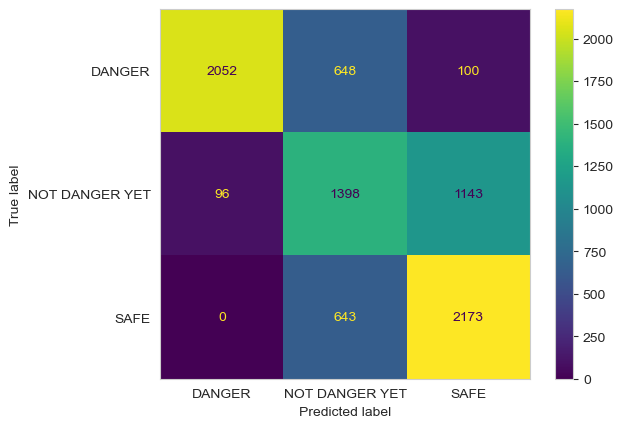

SVM-linear
Accuracy score of training 0.691
Error rate of training 0.178
Accuracy score of test 0.681
Error rate of test 0.204
              precision    recall  f1-score   support

           1       0.96      0.73      0.83      2800
           2       0.52      0.53      0.52      2637
           3       0.64      0.77      0.70      2816

    accuracy                           0.68      8253
   macro avg       0.70      0.68      0.68      8253
weighted avg       0.71      0.68      0.69      8253



In [32]:
classifier_SVC = SVC(kernel = 'linear',random_state = 42)
classifier=classifier_SVC
classifier.fit(X_train_scaled,np.array(y_train))
y_svc_train=classifier.predict(X_train_scaled)

y_svc_test=classifier.predict(X_test_scaled)


cm= confusion_matrix(y_test, y_svc_test, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[labels[classifier.classes_[0]],labels[classifier.classes_[1]],labels[classifier.classes_[2]]])
disp.plot()
plt.grid(False)
plt.show()

# Measure the performance
print('SVM-linear')
print("Accuracy score of training %.3f" %metrics.accuracy_score(y_train, y_svc_train))
print("Error rate of training %.3f" %mean_absolute_error(y_train,y_svc_train))
print("Accuracy score of test %.3f" %metrics.accuracy_score(y_test, y_svc_test))
print("Error rate of test %.3f" %mean_absolute_error(y_test,y_svc_test))
print(classification_report(y_test,y_svc_test))

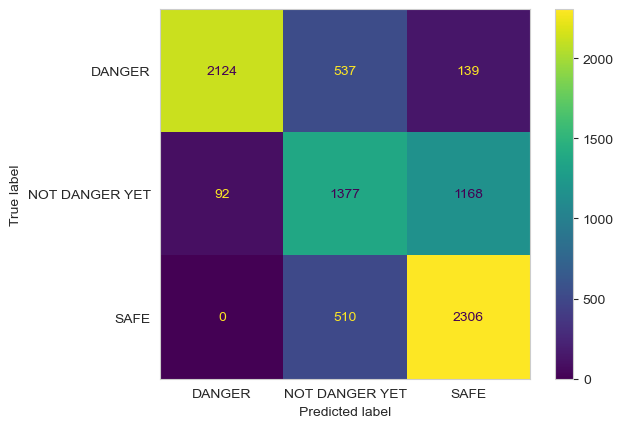

SVM-Ploy
Accuracy score of training 0.725
Error rate of training 0.172
Accuracy score of test 0.704
Error rate of test 0.196
              precision    recall  f1-score   support

           1       0.96      0.76      0.85      2800
           2       0.57      0.52      0.54      2637
           3       0.64      0.82      0.72      2816

    accuracy                           0.70      8253
   macro avg       0.72      0.70      0.70      8253
weighted avg       0.72      0.70      0.71      8253



In [33]:
from sklearn.svm import SVC
classifier_SVC = SVC(kernel = 'poly',random_state = 42)
classifier=classifier_SVC
classifier.fit(X_train_scaled,np.array(y_train))
y_svc_train=classifier.predict(X_train_scaled)

y_svc_test=classifier.predict(X_test_scaled)


cm= confusion_matrix(y_test, y_svc_test, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[labels[classifier.classes_[0]],labels[classifier.classes_[1]],labels[classifier.classes_[2]]])
disp.plot()
plt.grid(False)
plt.show()

# Measure the performance
print('SVM-Ploy')
print("Accuracy score of training %.3f" %metrics.accuracy_score(y_train, y_svc_train))
print("Error rate of training %.3f" %mean_absolute_error(y_train,y_svc_train))
print("Accuracy score of test %.3f" %metrics.accuracy_score(y_test, y_svc_test))
print("Error rate of test %.3f" %mean_absolute_error(y_test,y_svc_test))
print(classification_report(y_test,y_svc_test))

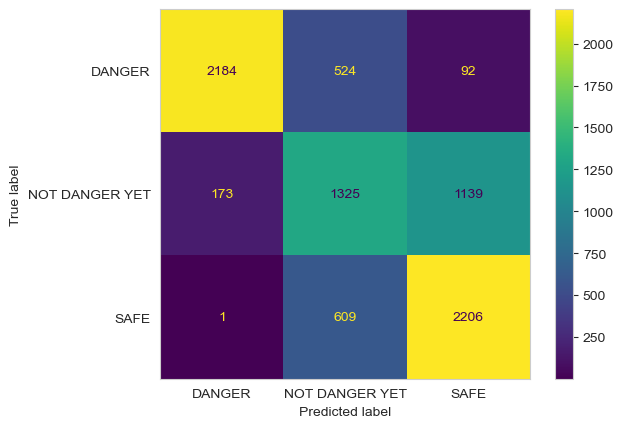

LogisticRegression
Accuracy score of training 0.690
Error rate of training 0.174
Accuracy score of test 0.692
Error rate of test 0.190
              precision    recall  f1-score   support

           1       0.93      0.78      0.85      2800
           2       0.54      0.50      0.52      2637
           3       0.64      0.78      0.71      2816

    accuracy                           0.69      8253
   macro avg       0.70      0.69      0.69      8253
weighted avg       0.71      0.69      0.69      8253



In [34]:
logistic_regression_model = LogisticRegression(max_iter=1000, random_state=42)
classifier=logistic_regression_model
classifier.fit(X_train_scaled,np.array(y_train))
y_svc_train=classifier.predict(X_train_scaled)

y_svc_test=classifier.predict(X_test_scaled)


cm= confusion_matrix(y_test, y_svc_test, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[labels[classifier.classes_[0]],labels[classifier.classes_[1]],labels[classifier.classes_[2]]])
disp.plot()
plt.grid(False)
plt.show()

# Measure the performance
print('LogisticRegression')
print("Accuracy score of training %.3f" %metrics.accuracy_score(y_train, y_svc_train))
print("Error rate of training %.3f" %mean_absolute_error(y_train,y_svc_train))
print("Accuracy score of test %.3f" %metrics.accuracy_score(y_test, y_svc_test))
print("Error rate of test %.3f" %mean_absolute_error(y_test,y_svc_test))
print(classification_report(y_test,y_svc_test))

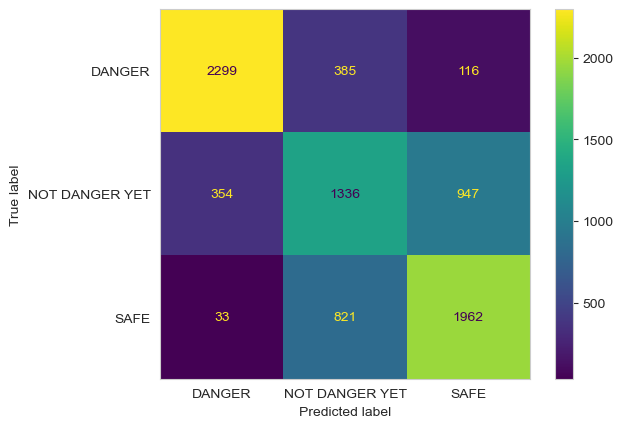

RandomForestClassifier
Accuracy score of training 0.993
Error rate of training 0.004
Accuracy score of test 0.678
Error rate of test 0.189
              precision    recall  f1-score   support

           1       0.86      0.82      0.84      2800
           2       0.53      0.51      0.52      2637
           3       0.65      0.70      0.67      2816

    accuracy                           0.68      8253
   macro avg       0.68      0.67      0.68      8253
weighted avg       0.68      0.68      0.68      8253



In [35]:
classifier_RF=RandomForestClassifier(n_estimators=10)
classifier=classifier_RF
classifier.fit(X_train_scaled,np.array(y_train))
y_svc_train=classifier.predict(X_train_scaled)

y_svc_test=classifier.predict(X_test_scaled)


cm= confusion_matrix(y_test, y_svc_test, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[labels[classifier.classes_[0]],labels[classifier.classes_[1]],labels[classifier.classes_[2]]])
disp.plot()
plt.grid(False)
plt.show()

# Measure the performance
print('RandomForestClassifier')
print("Accuracy score of training %.3f" %metrics.accuracy_score(y_train, y_svc_train))
print("Error rate of training %.3f" %mean_absolute_error(y_train,y_svc_train))
print("Accuracy score of test %.3f" %metrics.accuracy_score(y_test, y_svc_test))
print("Error rate of test %.3f" %mean_absolute_error(y_test,y_svc_test))
print(classification_report(y_test,y_svc_test))

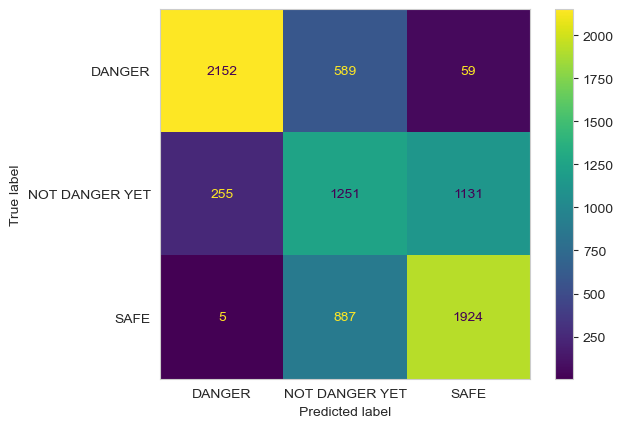

GaussianNB
Accuracy score of training 0.638
Error rate of training 0.200
Accuracy score of test 0.645
Error rate of test 0.206
              precision    recall  f1-score   support

           1       0.89      0.77      0.83      2800
           2       0.46      0.47      0.47      2637
           3       0.62      0.68      0.65      2816

    accuracy                           0.65      8253
   macro avg       0.66      0.64      0.65      8253
weighted avg       0.66      0.65      0.65      8253



In [36]:
gnb = GaussianNB()
classifier=gnb
classifier.fit(X_train_scaled,np.array(y_train))
y_svc_train=classifier.predict(X_train_scaled)

y_svc_test=classifier.predict(X_test_scaled)


cm= confusion_matrix(y_test, y_svc_test, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[labels[classifier.classes_[0]],labels[classifier.classes_[1]],labels[classifier.classes_[2]]])
disp.plot()
plt.grid(False)
plt.show()

# Measure the performance
print('GaussianNB')
print("Accuracy score of training %.3f" %metrics.accuracy_score(y_train, y_svc_train))
print("Error rate of training %.3f" %mean_absolute_error(y_train,y_svc_train))
print("Accuracy score of test %.3f" %metrics.accuracy_score(y_test, y_svc_test))
print("Error rate of test %.3f" %mean_absolute_error(y_test,y_svc_test))
print(classification_report(y_test,y_svc_test))

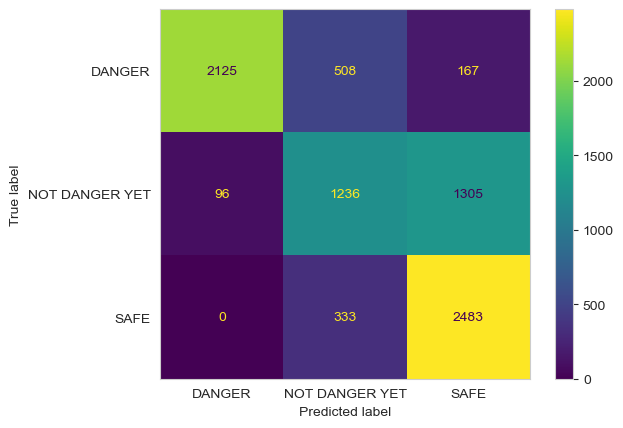

KNeighborsClassifier
Accuracy score of training 0.723
Error rate of training 0.172
Accuracy score of test 0.708
Error rate of test 0.200
              precision    recall  f1-score   support

           1       0.96      0.76      0.85      2800
           2       0.60      0.47      0.52      2637
           3       0.63      0.88      0.73      2816

    accuracy                           0.71      8253
   macro avg       0.73      0.70      0.70      8253
weighted avg       0.73      0.71      0.70      8253



In [37]:
knn=KNeighborsClassifier(n_neighbors=100)
classifier=knn
classifier.fit(X_train_scaled,np.array(y_train))
y_svc_train=classifier.predict(X_train_scaled)

y_svc_test=classifier.predict(X_test_scaled)


cm= confusion_matrix(y_test, y_svc_test, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[labels[classifier.classes_[0]],labels[classifier.classes_[1]],labels[classifier.classes_[2]]])
disp.plot()
plt.grid(False)
plt.show()

# Measure the performance
print('KNeighborsClassifier')
print("Accuracy score of training %.3f" %metrics.accuracy_score(y_train, y_svc_train))
print("Error rate of training %.3f" %mean_absolute_error(y_train,y_svc_train))
print("Accuracy score of test %.3f" %metrics.accuracy_score(y_test, y_svc_test))
print("Error rate of test %.3f" %mean_absolute_error(y_test,y_svc_test))
print(classification_report(y_test,y_svc_test))